In [1]:
%autosave 0

Autosave disabled


In [2]:
# Import the pandas package, then use the "read_csv" function to read
# the labeled training data
import pandas as pd       
train = pd.read_csv("ICHI-corpus3-MOD.tsv", header=0, \
                    delimiter="\t", quoting=2)

In [3]:
train.shape


(105, 2)

In [4]:
train.columns.values

array(['id', 'question'], dtype=object)

In [5]:
print (train["id"][0])

11.0


In [6]:
print (train["question"][0])

Sugar free My 90 year old Daddy just got diagnosed, the one thing he loves is Ice cream, can he eat sugar free ice cream?


In [7]:
print (train["question"][10])

Metformin Advice Please..I am just wondering if anyone knows if you take more than one pill of your usual dose of Metformin can it hurt/affect you in any way? I had my tea but I couldn't remember if I had my Metformin afterwards. Should I take a pill if I'm not sure. or should I just leave it?


In [8]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             
import re
import nltk
#nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list
#print (stopwords.words("english") )

In [9]:
from nltk.corpus import stopwords # Import the stop word list
#print (stopwords.words("english") )

In [10]:
def question_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [11]:
clean_question_train = question_to_words( train["question"][0] )
print (clean_question_train)

sugar free year old daddy got diagnosed one thing loves ice cream eat sugar free ice cream


In [12]:
# Get the number of reviews based on the dataframe column size
num_questions_train = train["question"].size
print num_questions_train

# Initialize an empty list to hold the clean reviews
#clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
#for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    #clean_train_reviews.append( review_to_words( train["review"][i] ) )

105


In [13]:
print ("Cleaning and parsing the training set questions...\n")
clean_train_questions = []

for i in range( 0, num_questions_train ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%10 == 0 ):
        print ("Question from train %d of %d\n" % ( i+1, num_questions_train )  )                                                                  
    clean_train_questions.append( question_to_words( train["question"][i] ))


Cleaning and parsing the training set questions...

Question from train 10 of 105

Question from train 20 of 105

Question from train 30 of 105

Question from train 40 of 105

Question from train 50 of 105

Question from train 60 of 105

Question from train 70 of 105

Question from train 80 of 105

Question from train 90 of 105

Question from train 100 of 105



In [14]:
print clean_train_questions[20]

new c going battery tests swollen axillary supraclavicular lymph nodes obviously looking cancer ultrasounds chest xray diagnostic mammogram scheduled lymph node removal weeks doctor leave town family emergency contact days great deal stress year also meds panic disorder generalized anxiety surgeon met yesterday said c diabetic right antibiotic see lymph nodes reacting unknown bacterial infection stuff going contribute higher reading fasting bg always normal last checked year ago


In [15]:
print clean_train_questions[0]

sugar free year old daddy got diagnosed one thing loves ice cream eat sugar free ice cream


In [16]:
print "Creating the bag of words for train set...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 900) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_questions)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


Creating the bag of words for train set...



In [17]:
print train_data_features.shape


(105L, 900L)


In [18]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
#print vocab

In [19]:
print train_data_features[0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
ngram_freq = {}
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
#    print count, tag
    ngram_freq[tag]=count



In [37]:

import operator
sorted_x = sorted(ngram_freq.items(), key=operator.itemgetter(1),reverse=True)
#print sorted_x
#n_items = take(3,   sorted_x.iteritems())
#print n_items
sorted_x[:10]

[(u'diabetes', 46),
 (u'sugar', 43),
 (u'metformin', 38),
 (u'type', 36),
 (u'blood', 34),
 (u'anyone', 33),
 (u'diabetic', 30),
 (u'eat', 26),
 (u'take', 23),
 (u'know', 22)]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def visualize_word_freq(input_data,max_words):
    """ 
    Input data should be a list of docs.
    Each doc is represented by one whole string (with preprocessing, eg.remove markups)    
    """
    # Plot configuration
    plt.style.use("ggplot")
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['figure.figsize'] = (20.0, 5.0)
    plt.rcParams['xtick.labelsize'] = 22
    
    vectorizer = CountVectorizer(max_features=max_words)
    TITLE = "MOST Freq Words"
        
    mat = vectorizer.fit_transform(input_data)
    
    pd.DataFrame(np.sum(mat,axis=0).T,
             index=vectorizer.get_feature_names(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).plot(kind='bar',title=TITLE)

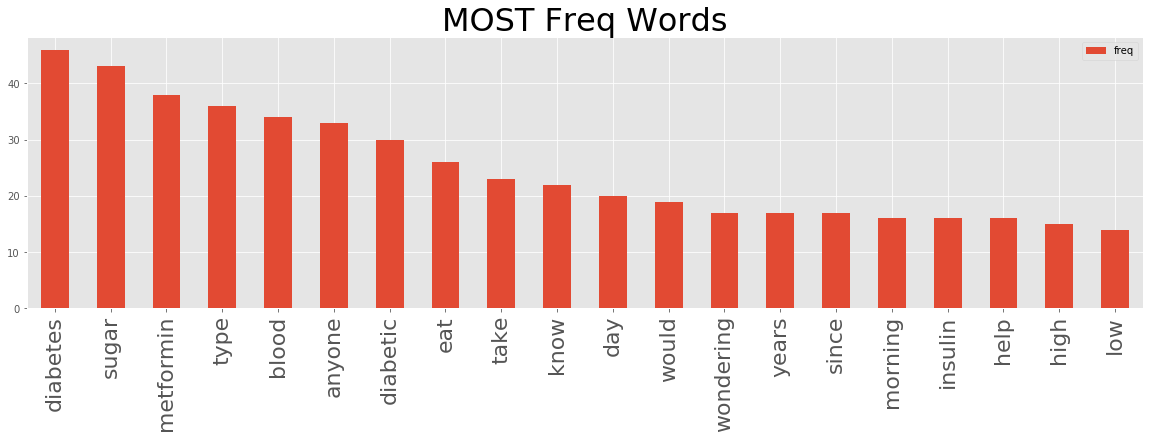

In [39]:
%matplotlib inline
visualize_word_freq(clean_train_questions,20)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("Creating the tf/idf...\n")
# Initialize the "TfidfVectorizer" object, which is scikit-learn's tf/idf tool.
"""
tfidf_vectorizer = TfidfVectorizer(max_df=1, \
                                   max_features=20, \
                                   min_df=1, \
                                   stop_words=None, \
                                   use_idf=True, \
                                   tokenizer=None, \
                                   ngram_range=(1,1)) 

"""

"""
CALCULA EL IF-tdf DE ACUERDO A LA EXPRESION 
morm (tf * LOGN(dT+1/dt+1)+1)
"""


tfidf_vectorizer = TfidfVectorizer(max_features=900)
# Tf-idf-weighted term-document sparse matrix 

tfidf_train_data_features = tfidf_vectorizer.fit_transform(clean_train_questions)




# Convert the result to nampy array 

tfidf_train_data_features_array= tfidf_train_data_features.toarray() 

print(tfidf_train_data_features_array.shape)
vocab = tfidf_vectorizer.get_feature_names()
#print vocab


Creating the tf/idf...

(105L, 900L)


In [43]:
#print train_data_features

In [44]:
#tfidf_train_data_features.A[0]

In [45]:
#check for sanity
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_train_data_features[0:1], tfidf_train_data_features).flatten()
cosine_similarities

array([ 1.        ,  0.        ,  0.        ,  0.03673628,  0.05018691,
        0.04009377,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03174107,  0.        ,  0.07202018,  0.02199356,  0.07105799,
        0.        ,  0.        ,  0.05094452,  0.03453765,  0.        ,
        0.02483711,  0.        ,  0.01772247,  0.        ,  0.04209686,
        0.07943853,  0.        ,  0.03513058,  0.        ,  0.        ,
        0.01019913,  0.09545637,  0.02195643,  0.04215165,  0.        ,
        0.        ,  0.        ,  0.01875223,  0.        ,  0.        ,
        0.07986977,  0.28246932,  0.01923789,  0.01844407,  0.        ,
        0.        ,  0.08554566,  0.        ,  0.11522225,  0.        ,
        0.        ,  0.        ,  0.05619191,  0.07441536,  0.248932  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0497615 ,  0.        ,  0.0660735 ,  0.07404125,  0.03812501,
        0.03350976,  0.21792006,  0.        ,  0.01939934,  0.  

In [46]:
related_indices = cosine_similarities.argsort()[:-6:-1]
related_indices


array([ 0, 41, 54, 94, 66], dtype=int64)

In [47]:
for i in related_indices:
    print (train["id"][i])

11.0
137.0
152.0
193.0
165.0


In [48]:
cosine_similarities[related_indices]

array([ 1.        ,  0.28246932,  0.248932  ,  0.23802954,  0.21792006])

In [50]:
# compute all
#"""
for i in range(0,10):
    cosine_similarities = linear_kernel(tfidf_train_data_features[i:i+1], tfidf_train_data_features).flatten()
#cosine_similarities
    related_indices = cosine_similarities.argsort()[:-5:-1]
    print ("Question  %d id %d most similar to \n" % ( i, train["id"][i])  )  
    #related_indices
    for i in related_indices:
        print (train["id"][i])
    #print (train["id"][related_indices])
    print
    print "Cosine vector "
    print
    print cosine_similarities[related_indices]
    print
#    """

Question  0 id 11 most similar to 

11.0
137.0
152.0
193.0

Cosine vector 

[ 1.          0.28246932  0.248932    0.23802954]

Question  1 id 12 most similar to 

12.0
127.0
167.0
203.0

Cosine vector 

[ 1.          0.3810436   0.14497921  0.10717328]

Question  2 id 13 most similar to 

13.0
154.0
125.0
200.0

Cosine vector 

[ 1.          0.17822766  0.16342329  0.14547338]

Question  3 id 14 most similar to 

14.0
103.0
164.0
15.0

Cosine vector 

[ 1.          0.34284112  0.13918243  0.13656304]

Question  4 id 15 most similar to 

15.0
113.0
162.0
179.0

Cosine vector 

[ 1.          0.32002504  0.28523738  0.25287308]

Question  5 id 16 most similar to 

16.0
192.0
142.0
15.0

Cosine vector 

[ 1.          0.28932099  0.1895357   0.177798  ]

Question  6 id 17 most similar to 

17.0
141.0
194.0
168.0

Cosine vector 

[ 1.          0.23340948  0.19994945  0.08422142]

Question  7 id 18 most similar to 

18.0
156.0
142.0
112.0

Cosine vector 

[ 1.          0.20230752  0.16199446 

In [51]:
#compute all similarities but the first 10 text (test questions)
for i in range(0,10):
    cosine_similarities = linear_kernel(tfidf_train_data_features[i:i+1], tfidf_train_data_features[10:105]).flatten()
#cosine_similarities
    related_indices = cosine_similarities.argsort()[:-5:-1]
    #related_indices+10
    print ("Question  %d id %d most similar to \n" % ( i, train["id"][i])  ) 
    for i in related_indices+10:
        print (train["id"][i])
    #print (train["id"][related_indices])
    print
    print "Cosine vector "
    print
    print cosine_similarities[related_indices]
    print
    #print (train["id"][related_indices+10])
    #print cosine_similarities[related_indices]
    #print


Question  0 id 11 most similar to 

137.0
152.0
193.0
165.0

Cosine vector 

[ 0.28246932  0.248932    0.23802954  0.21792006]

Question  1 id 12 most similar to 

127.0
167.0
203.0
105.0

Cosine vector 

[ 0.3810436   0.14497921  0.10717328  0.10589828]

Question  2 id 13 most similar to 

154.0
125.0
200.0
178.0

Cosine vector 

[ 0.17822766  0.16342329  0.14547338  0.13023331]

Question  3 id 14 most similar to 

103.0
164.0
179.0
121.0

Cosine vector 

[ 0.34284112  0.13918243  0.13221589  0.11284506]

Question  4 id 15 most similar to 

113.0
162.0
179.0
149.0

Cosine vector 

[ 0.32002504  0.28523738  0.25287308  0.24745405]

Question  5 id 16 most similar to 

192.0
142.0
198.0
113.0

Cosine vector 

[ 0.28932099  0.1895357   0.15652844  0.15436409]

Question  6 id 17 most similar to 

141.0
194.0
168.0
204.0

Cosine vector 

[ 0.23340948  0.19994945  0.08422142  0.07784399]

Question  7 id 18 most similar to 

156.0
142.0
112.0
202.0

Cosine vector 

[ 0.20230752  0.16199446  0